## Práctica 2: Regresión lineal con BGD
Programa 2
#### Escuela Superior de Cómputo
Ingeniería en IA
<br>
Aprendizaje Automático<br>
**Robles Guzmán Naomi Isabel** <br><br>

<p>Consuelo Varinia García Mendoza</p>
<br>

---



## Especificaciones

### I. Elabora un programa en python que implemente BGD multivariable
* Entrada: archivo *Dataset_multivariable.csv* número de interaciones, peso inicial y $\alpha$



---
#### 1. Importamos librerías

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [32]:
# Leer datos
df = pd.read_csv('Dataset_multivariable.csv')

# Parámetros de entrada
num_entradas = 5
num_iteraciones = 1000
peso_inicial = np.zeros(5)
alpha = 0.000001

X = df[['x1','x2','x3','x4','x5']].values # .iloc[:, -1]
y = df['y'].values


### II. Divide *Dataset_multivariable.csv* en 70% para entrenamiento y 30% para pruebas. 
con los parámetros shuffle=True  y random_state = 0


In [33]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0, shuffle=True)

---
### a) Definir función para implementar el algoritmo BGD
$$
w_i = w_i - 2\alpha \sum_{j=0}^{m-1}(w_i \cdot X_{i,j} - y_j) \cdot X_{j,i}
$$

In [ ]:
# Inicializar peso
w = peso_inicial

# Listas para almacenar resultados
pesos_historia = []
y_pred_historia = []
errores = []

# algoritmo BGD sin sesgo
for iteracion in range(num_iteraciones):
    # Guardar peso actual
    pesos_historia.append(w)
    
    for i in range(num_entradas):
        # Actualizar peso usando la fórmula BGD sin sesgo
        print("=== GRADIENTE ===")
        print(X_train[:, i])
        print(w[i])
        print(y_train)
        incremento_peso = np.dot((np.dot(X_train[:,i], w[i]) - y_train), X_train[:, i])
        print(incremento_peso)
        w[i] = w[i] - 2 * alpha * incremento_peso
        print(w)

    # Predicciones en conjunto de prueba
    y_pred_test = np.dot(w,X_test.T)
    y_pred_historia.append(y_pred_test.copy())
    
    # Calcular error de estimación (suma de diferencias absolutas)
    error = np.sum(np.abs(y_pred_test - y_test))
    errores.append(error)


=== GRADIENTE ===
[1. 1. 1. 1. 1. 1. 1.]
0.0
[37.7 14.5 29.  31.9 20.3 11.6 26.1]
-171.1
[0.0003422 0.0003422 0.0003422 0.0003422 0.0003422]
=== GRADIENTE ===
[2.2 0.6 1.6 1.8 1.  0.4 1.4]
0.00034219999999999997
[37.7 14.5 29.  31.9 20.3 11.6 26.1]
-256.935168136
[0.00085607 0.00085607 0.00085607 0.00085607 0.00085607]
=== GRADIENTE ===
[-39. -15. -30. -33. -21. -12. -27.]
0.0008560703362719999
[37.7 14.5 29.  31.9 20.3 11.6 26.1]
4885.022299127838
[-0.00891397 -0.00891397 -0.00891397 -0.00891397 -0.00891397]
=== GRADIENTE ===
[48. 16. 36. 40. 24. 12. 32.]
-0.008913974261983674
[37.7 14.5 29.  31.9 20.3 11.6 26.1]
-5887.380614686283
[0.00286079 0.00286079 0.00286079 0.00286079 0.00286079]
=== GRADIENTE ===
[25.5 11.9 20.4 22.1 15.3 10.2 18.7]
0.00286078696738889
[37.7 14.5 29.  31.9 20.3 11.6 26.1]
-3340.6491686730033
[0.00954209 0.00954209 0.00954209 0.00954209 0.00954209]
=== GRADIENTE ===
[1. 1. 1. 1. 1. 1. 1.]
0.009542085304734896
[37.7 14.5 29.  31.9 20.3 11.6 26.1]
-171.033205402

---
### III. Salida:
* peso en cada iteración
* y_test
* y_pred en cada iteración
* Error de estimación
* Gráfica 1: error de estimación en cada iteración


-----------[ w ]-------------------

Iteración 0 : [[0. 0. 0. 0. 0.]]
Iteración 1 : [[0.00954209 0.00954209 0.00954209 0.00954209 0.00954209]]
Iteración 2 : [[0.01880701 0.01880701 0.01880701 0.01880701 0.01880701]]
Iteración 3 : [[0.02780283 0.02780283 0.02780283 0.02780283 0.02780283]]
Iteración 4 : [[0.03653735 0.03653735 0.03653735 0.03653735 0.03653735]]
Iteración 5 : [[0.04501818 0.04501818 0.04501818 0.04501818 0.04501818]]
Iteración 6 : [[0.05325266 0.05325266 0.05325266 0.05325266 0.05325266]]
Iteración 7 : [[0.06124797 0.06124797 0.06124797 0.06124797 0.06124797]]
Iteración 8 : [[0.06901105 0.06901105 0.06901105 0.06901105 0.06901105]]
Iteración 9 : [[0.07654864 0.07654864 0.07654864 0.07654864 0.07654864]]
Iteración 10 : [[0.0838673 0.0838673 0.0838673 0.0838673 0.0838673]]
Iteración 11 : [[0.09097338 0.09097338 0.09097338 0.09097338 0.09097338]]
Iteración 12 : [[0.09787305 0.09787305 0.09787305 0.09787305 0.09787305]]
Iteración 13 : [[0.10457232 0.10457232 0.10457232 0.104

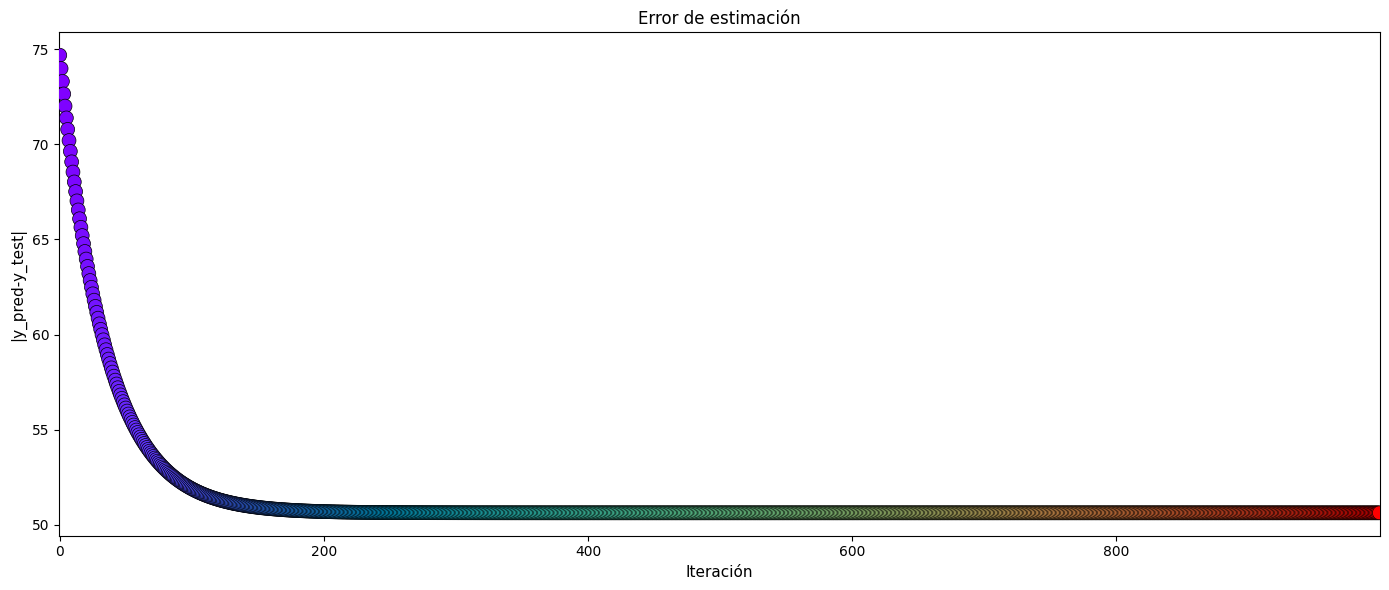

In [35]:

# Imprimir resultados
print("\n-----------[ w ]-------------------\n")
for i in range(num_iteraciones):
    print(f"Iteración {i} : [{pesos_historia[i]}]")

print("\n----------[ y_test ]---------------\n")
print(f"[{' '.join([f'{val:.2f}' for val in y_test])}]")

print("\n----------[ y_pred ]---------------\n")
for i in range(num_iteraciones):
    pred_str = ' '.join([f'{val:.8g}' for val in y_pred_historia[i]])
    print(f"Iteración {i} : [{pred_str}]")

print("\n---------[ Error de estimación ] ---\n")
for i in range(num_iteraciones):
    print(f"Iteración {i} : {errores[i]:.16g}")
    

# Crear las gráficas
fig, (ax1) = plt.subplots(1, figsize=(14, 6))

# Gráfica 2: Error de estimación
colores_error = plt.cm.rainbow(np.linspace(0, 1, num_iteraciones))
ax1.scatter(range(num_iteraciones), errores, 
           s=100, c=colores_error[:num_iteraciones], zorder=5, edgecolors='black', linewidth=0.5)

ax1.set_xlabel('Iteración', fontsize=11)
ax1.set_ylabel('|y_pred-y_test|', fontsize=11)
ax1.set_title('Error de estimación', fontsize=12)
ax1.grid(False)
ax1.set_xlim(-0.5, num_iteraciones - 0.5)

plt.tight_layout()
plt.show()